In [29]:
import pandas as pd
import numpy as np

In [30]:
df_adult = pd.read_csv("/kaggle/input/adult-income-data/adult.csv")
df_adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# DATA CLEANING

## AGE COLUMN

In [31]:
print(df_adult.age.isna().sum())
print(df_adult.age.isnull().sum())
print(df_adult.age.unique())
print("Age is good")

0
0
[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
Age is good


## WORKCLASS COLUMN

In [32]:
print(df_adult.workclass.isna().sum())
print(df_adult.workclass.isnull().sum())
print(df_adult.workclass.unique())
print("")
print("workclass not good so we have question marks")
print("")

# Count the number of question marks in the 'workclass' column
print("How many question marks are there in the column")
print((df_adult.workclass == "?").sum())

# Replace question marks with the mode of the 'workclass' column
print("Mode of workclass is:",df_adult['workclass'].mode()[0])
mode_workclass = df_adult['workclass'].mode()[0]
df_adult['workclass'] = df_adult['workclass'].replace('?', mode_workclass)
print("")
print("WORKING CLASS COLUMN GOOD")

0
0
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

workclass not good so we have question marks

How many question marks are there in the column
1836
Mode of workclass is: Private

WORKING CLASS COLUMN GOOD


## fnlwgt Final weight Column

In [33]:
print(df_adult.fnlwgt.describe())
#print(df_adult.fnlwgt.info())
print(df_adult.fnlwgt.isna().sum())
print(df_adult.fnlwgt.isnull().sum())
print("fnlwgt is good")

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64
0
0
fnlwgt is good


## education column

In [34]:
print(df_adult.education.isna().sum())
print(df_adult.education.isnull().sum())
print(df_adult.education.unique())
print("Education is good")

0
0
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
Education is good


In [35]:
print(df_adult['education.num'].isna().sum())
print(df_adult['education.num'].isnull().sum())
print(df_adult['education.num'].unique())
print("Education.num is good")

0
0
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
Education.num is good


In [36]:
print(df_adult['marital.status'].isna().sum())
print(df_adult['marital.status'].isnull().sum())
print(df_adult['marital.status'].unique())
print("marital.status is good")

0
0
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
marital.status is good


In [37]:
print(df_adult['occupation'].isna().sum())
print(df_adult['occupation'].isnull().sum())
print(df_adult['occupation'].unique())
print("occupation is good")

0
0
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
occupation is good


In [38]:
# Count the number of question marks in the 'occupation' column
print("How many question marks are there in the column")
print((df_adult.occupation == "?").sum())

# Replace question marks with the mode of the 'workclass' column
print("Mode of occupation is:",df_adult['occupation'].mode()[0])
mode_occupation = df_adult['occupation'].mode()[0]
df_adult['occupation'] = df_adult['occupation'].replace('?', mode_occupation)
print("")
print("occupation COLUMN GOOD")

How many question marks are there in the column
1843
Mode of occupation is: Prof-specialty

occupation COLUMN GOOD


In [39]:
print(df_adult['relationship'].isna().sum())
print(df_adult['relationship'].isnull().sum())
print(df_adult['relationship'].unique())
print("relationship is good")

0
0
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
relationship is good


In [40]:
print(df_adult['race'].isna().sum())
print(df_adult['race'].isnull().sum())
print(df_adult['race'].unique())
print("race is good")

0
0
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
race is good


In [41]:
print(df_adult['sex'].isna().sum())
print(df_adult['sex'].isnull().sum())
print(df_adult['sex'].unique())
print("sex column is good")

0
0
['Female' 'Male']
sex column is good


In [42]:
print(df_adult['capital.gain'].isna().sum())
print(df_adult['capital.gain'].isnull().sum())
print(df_adult['capital.gain'].unique())
print("capital.gain is good")

0
0
[    0 99999 41310 34095 27828 25236 25124 22040 20051 18481 15831 15024
 15020 14344 14084 13550 11678 10605 10566 10520  9562  9386  8614  7978
  7896  7688  7443  7430  7298  6849  6767  6723  6514  6497  6418  6360
  6097  5721  5556  5455  5178  5060  5013  4934  4931  4865  4787  4687
  4650  4508  4416  4386  4101  4064  3942  3908  3887  3818  3781  3674
  3471  3464  3456  3432  3418  3411  3325  3273  3137  3103  2993  2977
  2964  2961  2936  2907  2885  2829  2653  2635  2597  2580  2538  2463
  2414  2407  2387  2354  2346  2329  2290  2228  2202  2176  2174  2105
  2062  2050  2036  2009  1848  1831  1797  1639  1506  1471  1455  1424
  1409  1173  1151  1111  1086  1055   991   914   594   401   114]
capital.gain is good


In [43]:
print(df_adult['capital.loss'].isna().sum())
print(df_adult['capital.loss'].isnull().sum())
print(df_adult['capital.loss'].unique())
print("capital.loss is good")

0
0
[4356 3900 3770 3683 3004 2824 2754 2603 2559 2547 2489 2472 2467 2457
 2444 2415 2392 2377 2352 2339 2282 2267 2258 2246 2238 2231 2206 2205
 2201 2179 2174 2163 2149 2129 2080 2057 2051 2042 2002 2001 1980 1977
 1974 1944 1902 1887 1876 1848 1844 1825 1816 1762 1755 1741 1740 1735
 1726 1721 1719 1672 1669 1668 1651 1648 1628 1617 1602 1594 1590 1579
 1573 1564 1539 1504 1485 1411 1408 1380 1340 1258 1138 1092  974  880
  810  653  625  419  323  213  155    0]
capital.loss is good


In [44]:
print(df_adult['hours.per.week'].isna().sum())
print(df_adult['hours.per.week'].isnull().sum())
print(df_adult['hours.per.week'].unique())
print("hours.per.week is good")

0
0
[40 18 45 20 60 35 55 76 50 42 25 32 90 48 15 70 52 72 39  6 65 12 80 67
 99 30 75 26 36 10 84 38 62 44  8 28 59  5 24 57 34 37 46 56 41 98 43 63
  1 47 68 54  2 16  9  3  4 33 23 22 64 51 19 58 53 96 66 21  7 13 27 11
 14 77 31 78 49 17 85 87 88 73 89 97 94 29 82 86 91 81 92 61 74 95]
hours.per.week is good


In [45]:
print(df_adult['native.country'].isna().sum())
print(df_adult['native.country'].isnull().sum())
print(df_adult['native.country'].unique())
print("native.country is good")

0
0
['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'El-Salvador' 'Hungary' 'Columbia'
 'Guatemala' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Scotland'
 'Portugal' 'Laos' 'Thailand' 'Outlying-US(Guam-USVI-etc)']
native.country is good


In [46]:
# Count the number of question marks in the 'occupation' column
print("How many question marks are there in the column")
print((df_adult['native.country'] == "?").sum())

# Replace question marks with the mode of the native.country column
print("Mode of 'native.country is:",df_adult['native.country'].mode()[0])
mode_country = df_adult['native.country'].mode()[0]
df_adult['country'] = df_adult['native.country'].replace('?', mode_country)
print("")
print("native.country COLUMN GOOD")

How many question marks are there in the column
583
Mode of 'native.country is: United-States

native.country COLUMN GOOD


In [47]:
csv_path = '/kaggle/working/df_adult.csv'
df_adult.to_csv(csv_path, index=False)

print(f"DataFrame saved to {csv_path}")

DataFrame saved to /kaggle/working/df_adult.csv


# Demographic Analysis
## What are the demographic characteristics (age, education, marital status, race, sex) of individuals earning more  than $50,000 annually compared to those earning less?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df_adult['age_group'] = pd.cut(df_adult['age'], bins=age_bins, labels=age_labels, right=False)


# Extract count values for each group
age_counts = df_adult.groupby(['age_group', 'income']).size().unstack(fill_value=0)
education_counts = df_adult.groupby(['education', 'income']).size().unstack(fill_value=0)
marital_status_counts = df_adult.groupby(['marital.status', 'income']).size().unstack(fill_value=0)
race_counts = df_adult.groupby(['race', 'income']).size().unstack(fill_value=0)
sex_counts = df_adult.groupby(['sex', 'income']).size().unstack(fill_value=0)

# Display count values for interpretation
print("Age Group Counts:\n", age_counts)
print("\nEducation Counts:\n", education_counts)
print("\nMarital Status Counts:\n", marital_status_counts)
print("\nRace Counts:\n", race_counts)
print("\nSex Counts:\n", sex_counts)


# Creating a bar-in-bar chart for age, education, marital status, race, and sex
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

# Age distribution
sns.countplot(data=df_adult, x='age_group', hue='income', ax=axs[0, 0], palette='Set2').set_title('Age Group Distribution')
axs[0, 0].tick_params(axis='x', rotation=90)

# Education distribution
sns.countplot(data=df_adult, x='education', hue='income', ax=axs[0, 1], palette='Set2').set_title('Education Level')
axs[0, 1].tick_params(axis='x', rotation=90)

# Marital status distribution
sns.countplot(data=df_adult, x='marital.status', hue='income', ax=axs[1, 0], palette='Set2').set_title('Marital Status')
axs[1, 0].tick_params(axis='x', rotation=90)

# Race distribution
sns.countplot(data=df_adult, x='race', hue='income', ax=axs[1, 1], palette='Set2').set_title('Race')
axs[1, 1].tick_params(axis='x', rotation=90)

# Sex distribution
sns.countplot(data=df_adult, x='sex', hue='income', ax=axs[2, 0], palette='Set2').set_title('Sex')
axs[2, 0].tick_params(axis='x', rotation=90)

# Hide the empty subplot (axs[2, 1])
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

Age Group Counts:
 income     <=50K  >50K
age_group             
0-10           0     0
10-20       1655     2
20-30       7545   509
30-40       6304  2309
40-50       4513  2662
50-60       2711  1707
60-70       1476   539
70-80        411    97
80-90         70     8
90-100        35     8

Education Counts:
 income        <=50K  >50K
education                
10th            871    62
11th           1115    60
12th            400    33
1st-4th         162     6
5th-6th         317    16
7th-8th         606    40
9th             487    27
Assoc-acdm      802   265
Assoc-voc      1021   361
Bachelors      3134  2221
Doctorate       107   306
HS-grad        8826  1675
Masters         764   959
Preschool        51     0
Prof-school     153   423
Some-college   5904  1387

Marital Status Counts:
 income                 <=50K  >50K
marital.status                    
Divorced                3980   463
Married-AF-spouse         13    10
Married-civ-spouse      8284  6692
Married-spouse-ab

/tmp/ipykernel_33/3531737396.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df_adult.groupby(['age_group', 'income']).size().unstack(fill_value=0)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warn

## AGE DISTRIBUTION
### Deductions
* The majority of individuals earning more than $50,000 annually fall within the 30-60 age range, with a significant concentration in the 40-50 age group.
* Younger age groups (10-20) have very few high earners.
* Older age groups (70-100) have a smaller but noticeable number of high earners compared to the younger ones.

## EDUCATION LEVEL DISTRIBUTION
### Deductions
* Higher educational attainment is strongly associated with higher earnings.
* The highest concentrations of high earners (>50K) are among those with Bachelor's degrees, Master's degrees, Professional school, and Doctorate degrees.
* Those with lower educational levels (e.g., 1st-4th, 5th-6th, 7th-8th) predominantly fall into the <=50K income category.

## MARITAL STATUS DISTRIBTUION
### Deductions
* Married individuals (especially Married-civ-spouse) are more likely to earn over $50,000 annually compared to other marital statuses.
* A significant portion of high earners are married, highlighting the correlation between marriage and higher income.
* Individuals who have never married form the largest group in the <=50K income category.

## RACE DISTRIBUTION
### Deductions
* White individuals represent the largest group in both income categories, but they have a higher proportion of high earners compared to other races.
* Asian-Pac-Islanders have a relatively high proportion of individuals earning more than $50,000 compared to their total numbers.
* Black individuals and other races have fewer high earners relative to their representation in the <=50K income category.

## SEX DISTRIBUTION
### Deductions
* A significantly higher proportion of men earn more than $50,000 annually compared to women.
* Men are more likely to be in the higher income group, while women predominantly fall into the <=50K income category.
* This highlights a gender disparity in earnings.

## Summary
#### Age, education, marital status, race, and sex all show clear patterns of variation between income groups. Higher education levels and being married are associated with higher income. There are noticeable disparities in income based on gender and race, with men and White individuals more likely to earn above $50,000 annually.

# Work Class and Occupation:
## How do different work classes (e.g., Private, Self-Employed, Government) and occupations (e.g., Exec-managerial, Machine-op-inspct) impact the likelihood of earning more than $50,000? 
## Are there specific work classes or occupations that are more likely to earn higher incomes?

Proportion of >$50K by Work Class:
 income            <=50K  >50K  proportion_>50K
workclass                                     
Federal-gov         589   371         0.386458
Local-gov          1476   617         0.294792
Never-worked          7     0         0.000000
Private           19378  5154         0.210093
Self-emp-inc        494   622         0.557348
Self-emp-not-inc   1817   724         0.284927
State-gov           945   353         0.271957
Without-pay          14     0         0.000000

Proportion of >$50K by Occupation:
 income             <=50K  >50K  proportion_>50K
occupation                                     
Adm-clerical        3263   507         0.134483
Armed-Forces           8     1         0.111111
Craft-repair        3170   929         0.226641
Exec-managerial     2098  1968         0.484014
Farming-fishing      879   115         0.115694
Handlers-cleaners   1284    86         0.062774
Machine-op-inspct   1752   250         0.124875
Other-service       3158 

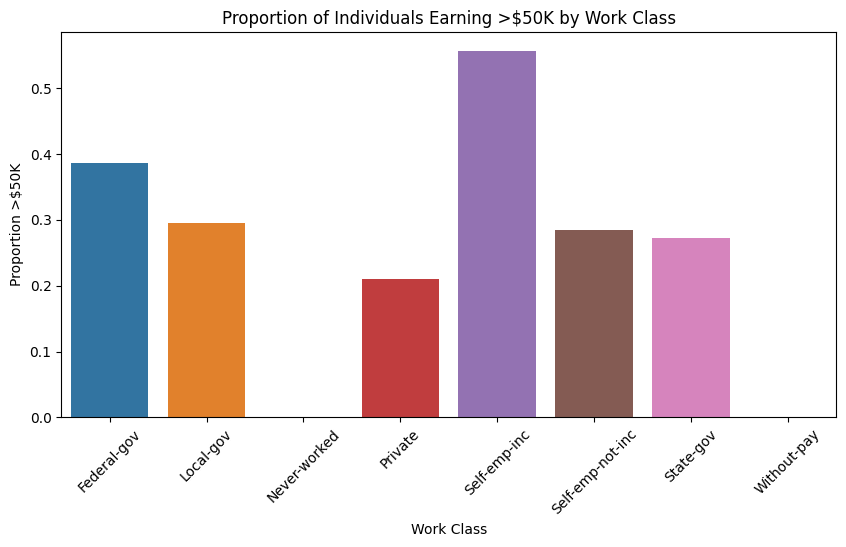

In [ ]:
# Calculate the proportion of individuals earning >$50K within each workclass
workclass_income = df_adult.groupby(['workclass', 'income']).size().unstack(fill_value=0)
workclass_income['proportion_>50K'] = workclass_income['>50K'] / (workclass_income['>50K'] + workclass_income['<=50K'])

# Calculate the proportion of individuals earning >$50K within each occupation
occupation_income = df_adult.groupby(['occupation', 'income']).size().unstack(fill_value=0)
occupation_income['proportion_>50K'] = occupation_income['>50K'] / (occupation_income['>50K'] + occupation_income['<=50K'])

# Display the results
print("Proportion of >$50K by Work Class:\n", workclass_income)
print("\nProportion of >$50K by Occupation:\n", occupation_income)

# Plot the proportions for workclass
plt.figure(figsize=(10, 5))
sns.barplot(x=workclass_income.index, y=workclass_income['proportion_>50K'])
plt.title('Proportion of Individuals Earning >$50K by Work Class')
plt.xlabel('Work Class')
plt.ylabel('Proportion >$50K')
plt.xticks(rotation=45)
plt.show()

# Plot the proportions for occupation
plt.figure(figsize=(15, 5))
sns.barplot(x=occupation_income.index, y=occupation_income['proportion_>50K'])
plt.title('Proportion of Individuals Earning >$50K by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Proportion >$50K')
plt.xticks(rotation=45)
plt.show()

## INSIGHTS
### Work Class:
1. Self-emp-inc (Self-employed incorporated) has the highest proportion of high earners with 55.7%.
2. Federal-gov workers also have a relatively high proportion of high earners with 38.6%.
3. Private sector workers have a lower proportion of high earners at 21%.
4. Never-worked and Without-pay categories have no high earners, which is expected.
5. Local-gov, State-gov, and Self-emp-not-inc (Self-employed not incorporated) also show moderate proportions of high earners at approximately 27-30%.

### Occupation:
1. Exec-managerial occupations have a high proportion of high earners at 48.4%, indicating significant earnings potential in management roles.
2. Prof-specialty (Professional specialty) occupations also show a high proportion of high earners at 34.3%.
3. Protective-serv (Protective services) and Tech-support roles show moderately high proportions of high earners at approximately 30-32%.
4. Other-service, Priv-house-serv (Private household services), Handlers-cleaners, and Farming-fishing occupations have the lowest proportions of high earners, indicating lower earnings potential in these roles.
5. Sales and Craft-repair occupations have moderate proportions of high earners, suggesting varied earnings potential based on specific roles within these categories.

# Education and Work Hours:

## How does the level of education and the number of hours worked per week correlate with income levels?
## Is there a significant difference in the education levels and working hours between high-income and low-income earners

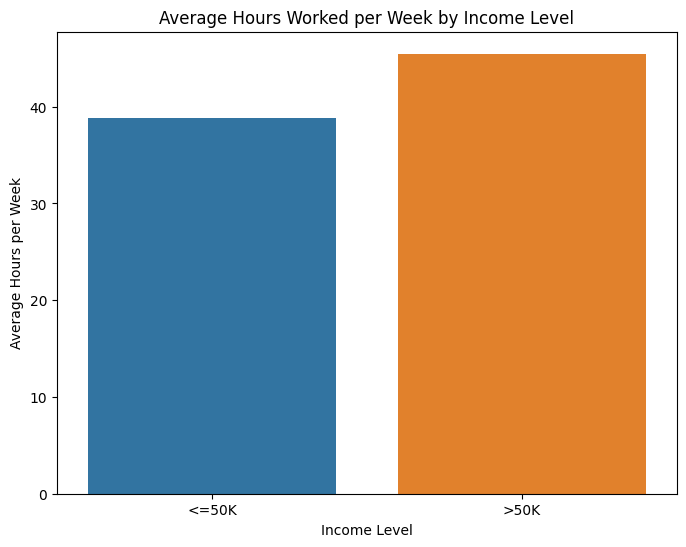

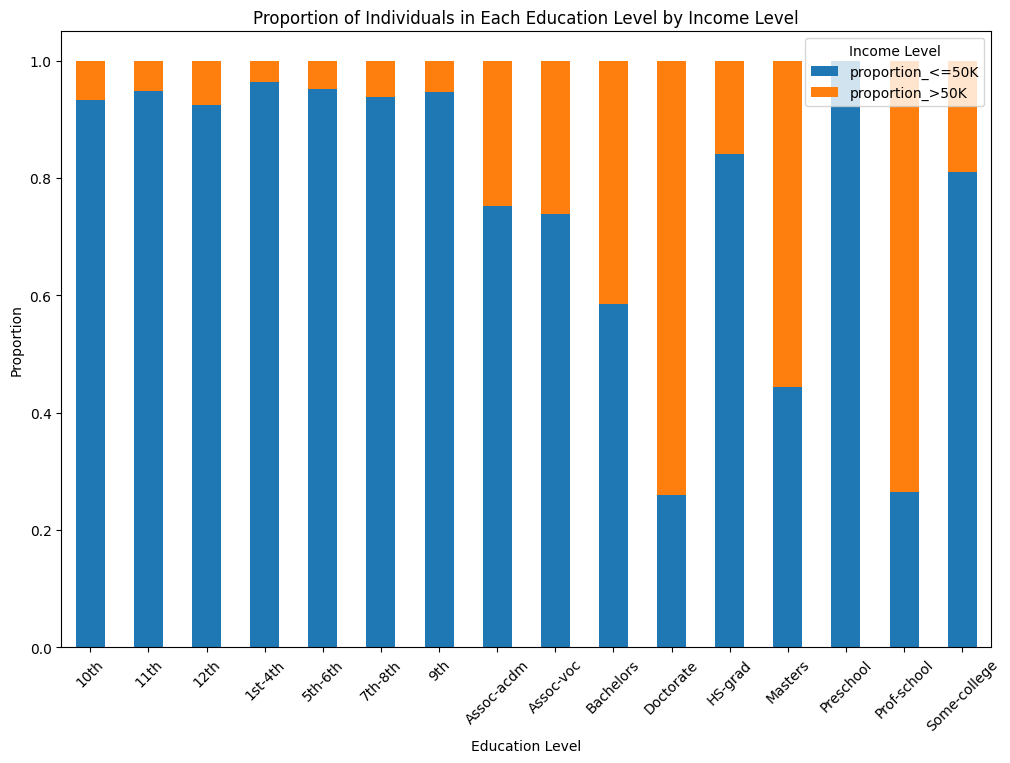

In [50]:
# Calculate average hours worked per week for each income group
avg_hours_per_income = df_adult.groupby('income')['hours.per.week'].mean()

# Calculate the proportion of individuals in each education level for each income group
education_counts = df_adult.groupby(['education', 'income']).size().unstack(fill_value=0)
education_counts['total'] = education_counts['<=50K'] + education_counts['>50K']
education_counts['proportion_<=50K'] = education_counts['<=50K'] / education_counts['total']
education_counts['proportion_>50K'] = education_counts['>50K'] / education_counts['total']

# Plot the average hours worked per week for each income group
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_hours_per_income.index, y=avg_hours_per_income.values)
plt.title('Average Hours Worked per Week by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Average Hours per Week')
plt.show()

# Plot the proportion of individuals in each education level for each income group
education_counts[['proportion_<=50K', 'proportion_>50K']].plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Proportion of Individuals in Each Education Level by Income Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Income Level')
plt.show()


## Individuals earning more than $50,000 work on an average, more hours per week compared to those earning less than or equal to 50,000
## Higher education levels (e.g., Masters, Prof-school, Doctorate and Bachelors) have a larger proportion of high-income earners (>50k)
## Lower education levels (e.g., HS-grad, 11th, 9th) predominantly fall into the lower income group.

* Education Level: There is a significant difference in the education levels between high-income and low-income earners. Higher levels of education correlate with higher income levels.
* Working Hours: High-income earners tend to work more hours per week on average compared to low-income earners.
These findings suggest that both higher education and increased working hours are associated with higher income levels.

# ENCODING

In [55]:

workclass_map = {
  'Private': 1,
  'State-gov': 2,
  'Federal-gov': 3,
  'Self-emp-not-inc': 4,
  'Self-emp-inc': 5,
  'Local-gov': 6,
  'Without-pay': 7,
  'Never-worked': 8,
  '?': 9  # Assign a rank for missing values
}

df_adult['workclass_rank'] = df_adult['workclass'].map(workclass_map)



In [58]:

education_ranks = {
  'Preschool': 1,
  '1st-4th': 2,
  '5th-6th': 3,
  '7th-8th': 4,
  '9th': 5,
  '10th': 6,
  '11th': 7,
  '12th': 8,
  'HS-grad': 9,
  'Some-college': 10,
  'Assoc-voc': 11,
  'Assoc-acdm': 12,
  'Bachelors': 13,
  'Masters': 14,
  'Prof-school': 15,
  'Doctorate': 16
}


df_adult['education_rank'] = df_adult['education'].map(education_ranks)

df_adult


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,country,age_group,workclass_rank,education_rank
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K,United-States,90-100,1,9
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,United-States,80-90,1,9
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K,United-States,60-70,1,10
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,United-States,50-60,1,4
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,United-States,40-50,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,United-States,20-30,1,10
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,United-States,20-30,1,12
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,United-States,40-50,1,9
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,United-States,50-60,1,9


In [60]:

marital_map = {
  'Married-civ-spouse': 1,
  'Married-spouse-absent': 1,
  'Married-AF-spouse': 1,
  'Widowed': 2,
  'Divorced': 2,
  'Separated': 2,
  'Never-married': 2
}

df_adult['marital_status_binary'] = df_adult['marital.status'].map(marital_map)



In [63]:
occupation_map = {
      'Exec-managerial': 1,
      'Machine-op-inspct': 2,
      'Prof-specialty': 3,
      'Other-service': 4,
      'Adm-clerical': 5,
      'Craft-repair': 6,
      'Transport-moving': 7,
      'Handlers-cleaners': 8,
      'Sales': 9,
      'Farming-fishing': 10,
      'Tech-support': 11,
      'Protective-serv': 12,
      'Armed-Forces': 13,
      'Priv-house-serv': 14
  }
df_adult['occupation_rank'] = df_adult['occupation'].map(occupation_map)


In [64]:
relationship_map = {
  'Not-in-family': 1,
  'Unmarried': 2,
  'Own-child': 3,
  'Other-relative': 4,
  'Husband': 5,
  'Wife': 6
}

df_adult['relationship_rank'] = df_adult['relationship'].map(relationship_map)


In [65]:
income_map = {
  '<=50K': 0,
  '>50K': 1
}

df_adult['income_binary'] = df_adult['income'].map(income_map)



In [72]:
numeric_cols = df_adult.select_dtypes(include=['int64', 'float64']).columns
df_adult= df_adult[numeric_cols]

In [73]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    32561 non-null  int64
 1   fnlwgt                 32561 non-null  int64
 2   education.num          32561 non-null  int64
 3   capital.gain           32561 non-null  int64
 4   capital.loss           32561 non-null  int64
 5   hours.per.week         32561 non-null  int64
 6   workclass_rank         32561 non-null  int64
 7   education_rank         32561 non-null  int64
 8   marital_status_binary  32561 non-null  int64
 9   occupation_rank        32561 non-null  int64
 10  relationship_rank      32561 non-null  int64
 11  income_binary          32561 non-null  int64
dtypes: int64(12)
memory usage: 3.0 MB


# TRAIN TEST SPLIT

In [75]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Features and target variable
X = df_adult.drop('income_binary', axis=1)  # Features
y = df_adult['income_binary']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to LightGBM format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Hyperparameter tuning using GridSearchCV (optional but recommended)
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_bin': [255, 510],
    'boosting_type': ['gbdt'],
    'objective': ['binary'],
    'metric': ['auc']
}





# TRAINING

In [76]:
# Create a model instance
gbm = lgb.LGBMClassifier()

# Perform grid search
grid_search = GridSearchCV(gbm, param_grid, scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:", best_params)

# Train the model with best parameters
model = lgb.train(best_params, train_data, valid_sets=[test_data])


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Number of positive: 4203, number of negative: 13162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 17365, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242039 -> initscore=-1.141535
[LightGBM] [Info] Start training from score -1.141535
[LightGBM] [Info] Number of positive: 4202, number of negative: 13163
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 17365, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.241981 -> initscore=-1.141849
[LightGBM

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


## TESTING

In [77]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred_binary)

print('Accuracy:', accuracy)
print('AUC:', auc)
print('Classification Report:')
print(report)

Accuracy: 0.8707200982650084
AUC: 0.9265498465503644
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4976
           1       0.79      0.62      0.69      1537

    accuracy                           0.87      6513
   macro avg       0.84      0.78      0.81      6513
weighted avg       0.87      0.87      0.87      6513

[LightGBM] [Info] Number of positive: 4203, number of negative: 13163
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 618
[LightGBM] [Info] Number of data points in the train set: 17366, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242025 -> initscore=-1.141611
[LightGBM] [Info] Start training from score -1.141611
[LightGBM] [Info] Number of positive: 420

# MODEL EXPLAINABILITY

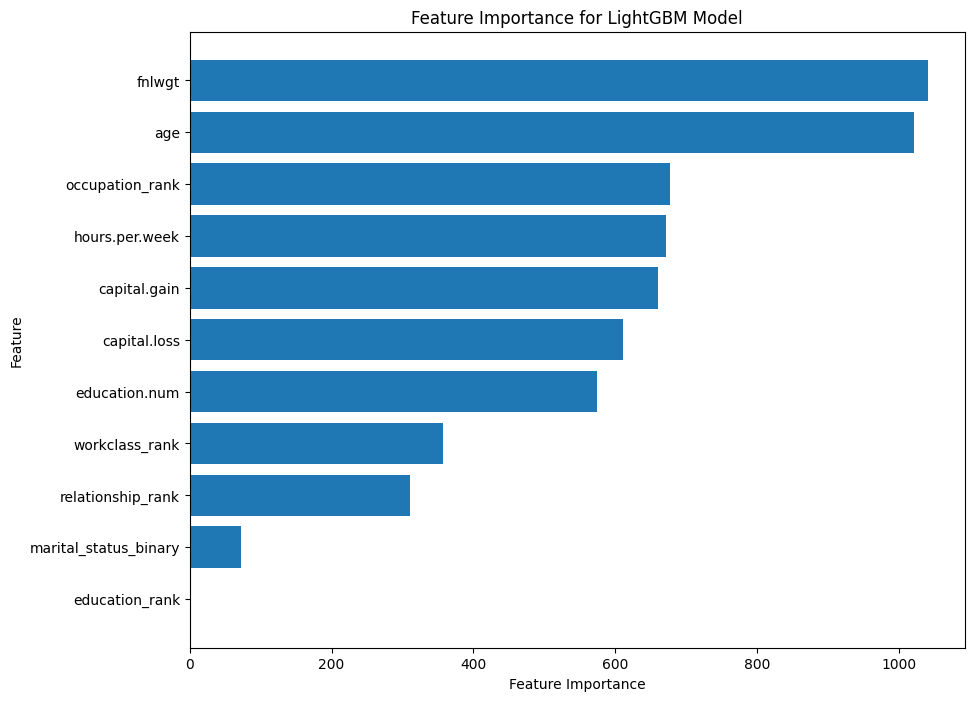

In [78]:
# Feature importance
importance = model.feature_importance()
feature_names = X_train.columns

# Create a DataFrame for the feature importance
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values(by='importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for LightGBM Model')
plt.gca().invert_yaxis()
plt.show()